# Лабораторная №2
#### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

#### Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализация числовых признаков. 

# Описание данных
* Date - Дата наблюдений
* Location - Название локации, в которой расположена метеорологическая станция
* MinTemp - Минимальная температура в градусах цельсия
* MaxTemp - Максимальная температура в градусах цельсия
* Rainfall - Количество осадков, зафиксированных за день в мм
* Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
* Sunshine - Число солнечных часов за день
* WindGustDir - направление самого сильного порыва ветра за последние 24 часа
* WindGustSpeed -  скорость (км / ч) самого сильного порыва ветра за последние 24 часа
* WindDir9am - направление ветра в 9 утра

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Устранение пропусков в данных

Светлым цветом отметим пропущенные данные

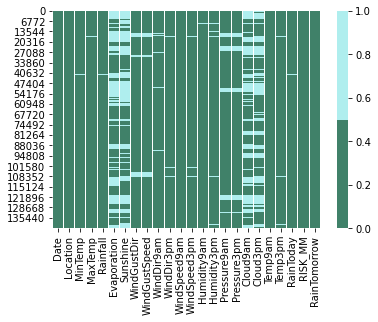

In [4]:
cols = data.columns
colours = ['#408169', '#AFEEEE'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

Рассмотрим числовые колонки с пропущенными значениями

In [68]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка MinTemp. Тип данных float64. Количество пустых значений 637, 0.45%.
Колонка MaxTemp. Тип данных float64. Количество пустых значений 322, 0.23%.
Колонка Rainfall. Тип данных float64. Количество пустых значений 1406, 0.99%.
Колонка Evaporation. Тип данных float64. Количество пустых значений 60843, 42.79%.
Колонка Sunshine. Тип данных float64. Количество пустых значений 67816, 47.69%.
Колонка WindGustSpeed. Тип данных float64. Количество пустых значений 9270, 6.52%.
Колонка WindSpeed9am. Тип данных float64. Количество пустых значений 1348, 0.95%.
Колонка WindSpeed3pm. Тип данных float64. Количество пустых значений 2630, 1.85%.
Колонка Humidity9am. Тип данных float64. Количество пустых значений 1774, 1.25%.
Колонка Humidity3pm. Тип данных float64. Количество пустых значений 3610, 2.54%.
Колонка Pressure9am. Тип данных float64. Количество пустых значений 14014, 9.86%.
Колонка Pressure3pm. Тип данных float64. Количество пустых значений 13981, 9.83%.
Колонка Cloud9am. Тип данных float

Фильтр по колонкам с пропущенными значениями

In [6]:
data_num = data[num_cols]
data_num

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


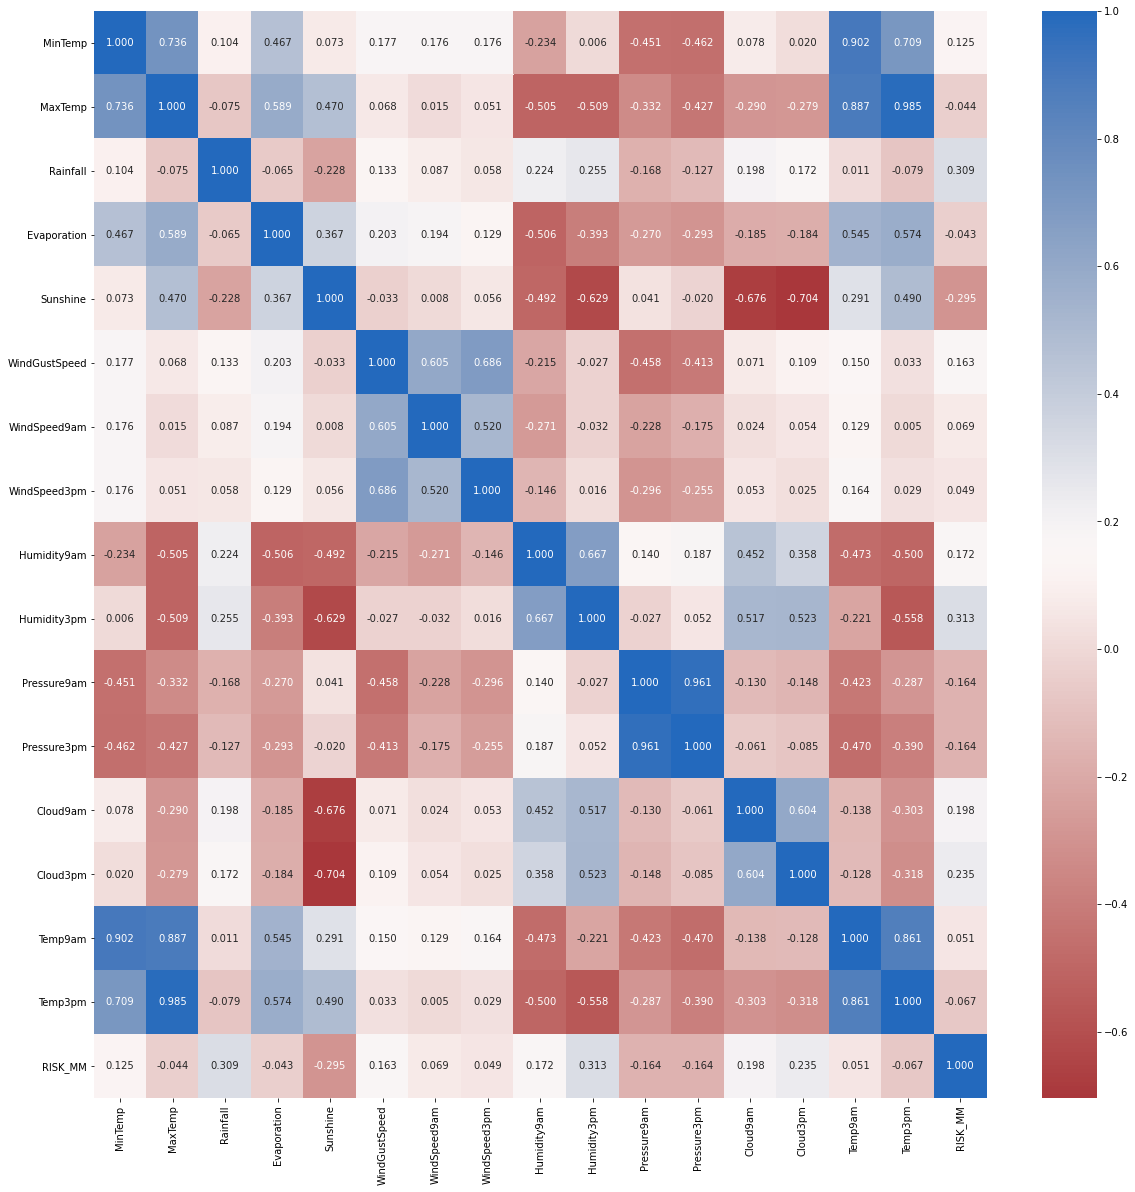

In [30]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

corrmat = data.corr()    
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, fmt='.3f', cmap="vlag_r")

В столбце Evaporation 42.79% пропущенных данных, и его корреляция с целевым признаком низкая, так что легче всего этот столбец удалить.

In [69]:
data = data.drop(['Evaporation'], axis = 1)
num_cols.remove('Evaporation')

Все распределения, кроме Sunshine, одномодальные, так что будем использовать для заполнения пропусков моду. Для Sunshine медиану. 

In [70]:
data['Sunshine'] = data['Sunshine'].fillna(data.median(numeric_only=True))

In [71]:
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mode())

In [72]:
data = data.fillna(data.mode())

Рассмотрим пропуски в категориальных данных

In [21]:
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка WindGustDir. Тип данных object. Количество пустых значений 9330, 6.56%.
Колонка WindDir9am. Тип данных object. Количество пустых значений 10013, 7.04%.
Колонка WindDir3pm. Тип данных object. Количество пустых значений 3778, 2.66%.
Колонка RainToday. Тип данных object. Количество пустых значений 1406, 0.99%.


In [75]:
for col in data[cat_cols]:
    print('Колонка {}. {}'.format(col, data[col].unique()))

Колонка WindGustDir. ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
Колонка WindDir9am. ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Колонка WindDir3pm. ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Колонка RainToday. ['No' 'Yes' nan]


In [73]:
data[:] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Sunshine       142193 non-null  float64       
 6   WindGustDir    142193 non-null  object        
 7   WindGustSpeed  142193 non-null  float64       
 8   WindDir9am     142193 non-null  object        
 9   WindDir3pm     142193 non-null  object        
 10  WindSpeed9am   142193 non-null  float64       
 11  WindSpeed3pm   142193 non-null  float64       
 12  Humidity9am    142193 non-null  float64       
 13  Humidity3pm    142193 non-null  float64       
 14  Pressure9am    142193 non-null  float64       
 15  

In [42]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Кодирование категориальных признаков

In [74]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [136]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Слишком много категорий Location для OneHotEncoder

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])

In [76]:
categorical = ['WindDir3pm','WindDir9am', 'WindGustDir']

data = pd.concat([data, pd.get_dummies(data[categorical], columns=categorical, drop_first=True)],axis=1)
data.drop(categorical, axis=1, inplace=True)

In [11]:
data.shape

(142193, 65)

## Нормализация числовых признаков

In [77]:
data[num_cols] = data[data[num_cols] > 0][num_cols]

In [79]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [128]:
def diagnostic_plots_data(df):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df.hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df, dist="norm", plot=plt)
    plt.show()

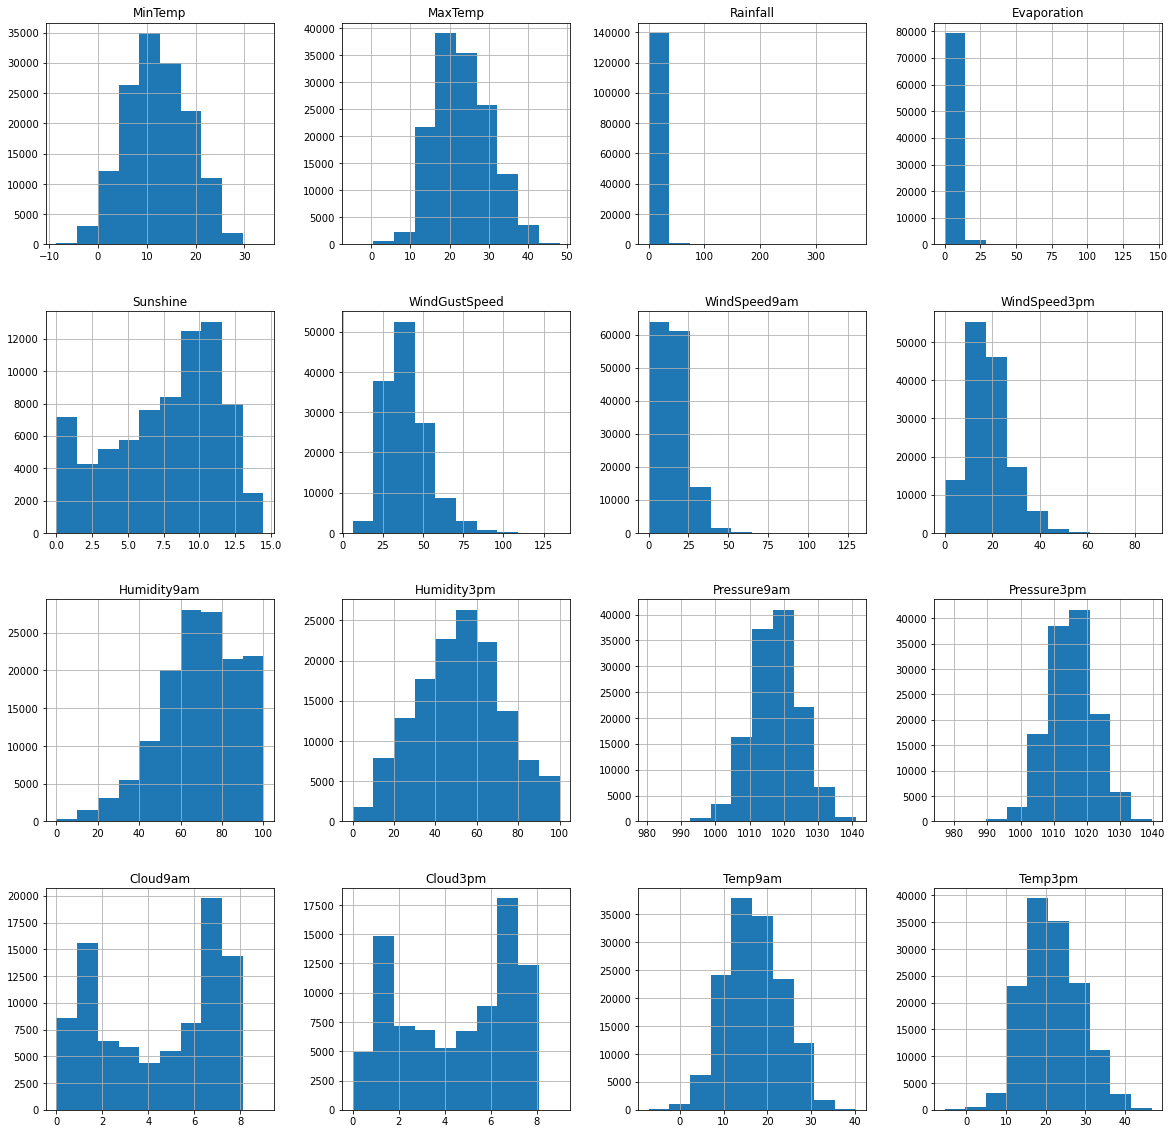

In [59]:
data_num.hist(figsize=(20,20))
plt.show()

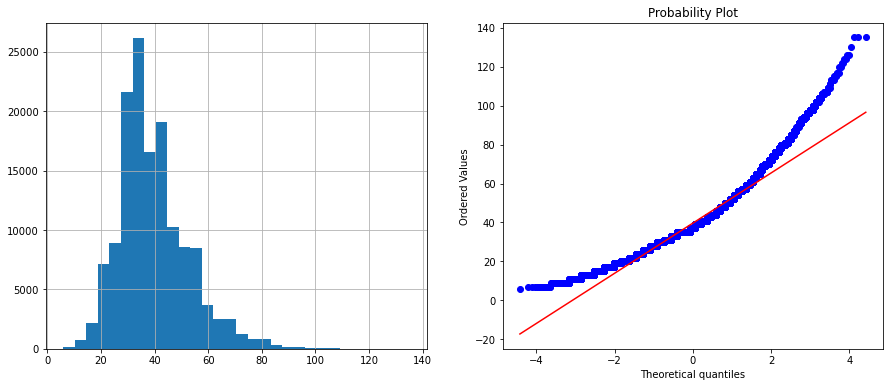

Оптимальное значение λ = 0.21000467599892894


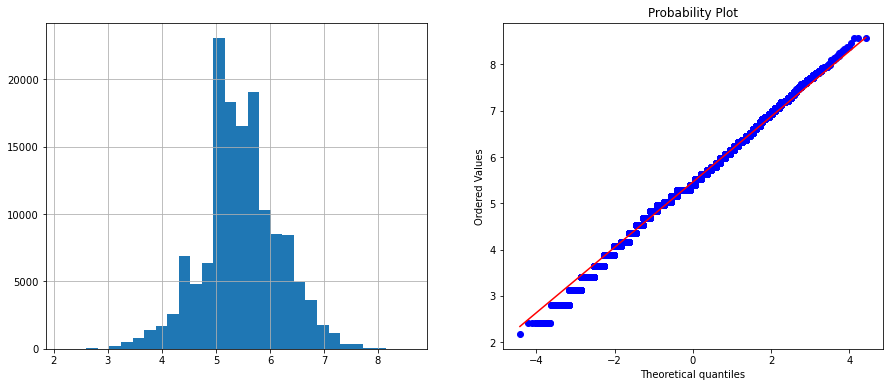

In [138]:
diagnostic_plots(data, 'WindGustSpeed')

data['WindGustSpeed_boxcox'], param = stats.boxcox(data['WindGustSpeed']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'WindGustSpeed_boxcox')

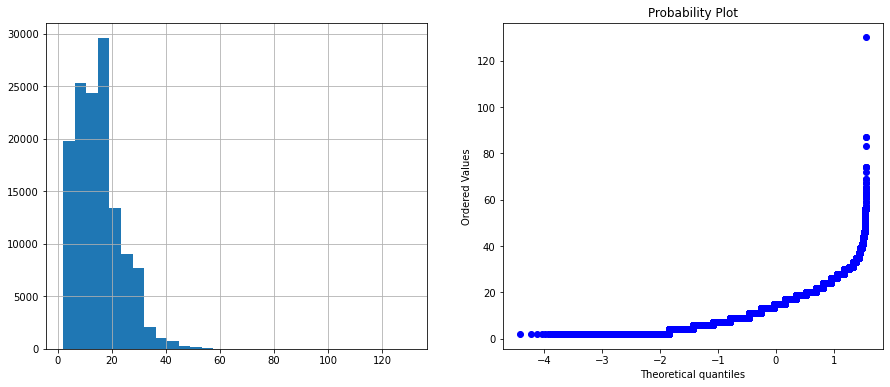

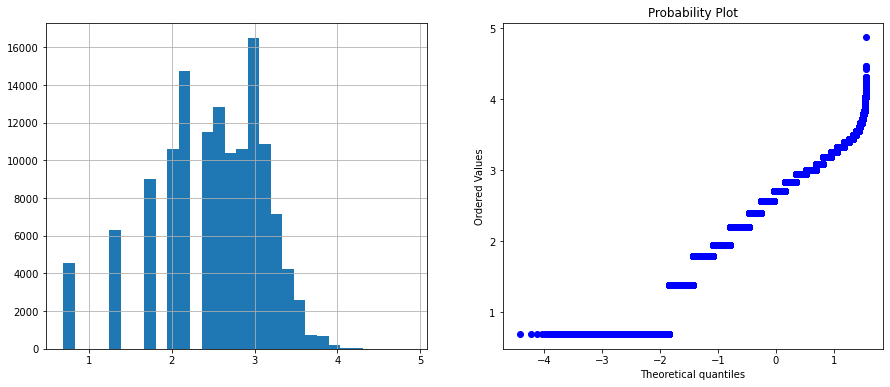

In [139]:
diagnostic_plots(data, 'WindSpeed9am')
diagnostic_plots_data( np.log(data['WindSpeed9am']) )

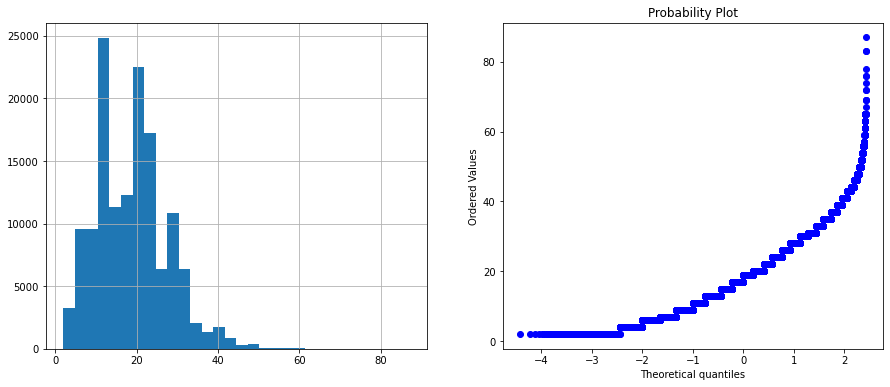

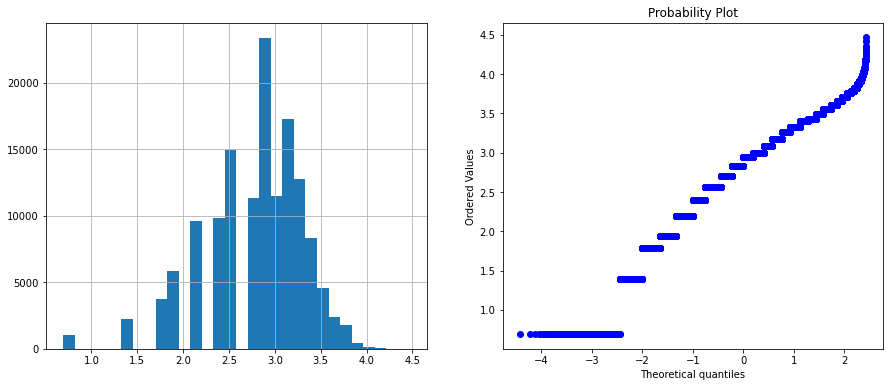

In [167]:
diagnostic_plots(data, 'WindSpeed3pm')
diagnostic_plots_data( np.log( (data['WindSpeed3pm']) ) )

In [81]:
data['WindSpeed9am'] = np.log( (data['WindSpeed9am']) )
data['WindSpeed3pm'] = np.log( (data['WindSpeed3pm']) )
data['WindGustSpeed'], param = stats.boxcox(data['WindGustSpeed']) 